In [1]:
import numpy as np
from paramagpy import protein, dataparse, fit, metal
import matplotlib as mt
from matplotlib.ticker import AutoMinorLocator, MaxNLocator
import copy as c
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cf
import scipy.stats as sct
from tqdm import tqdm

In [2]:
import warnings
from Bio import PDB

# Suppress PDBConstructionWarning
from Bio.PDB.PDBExceptions import PDBConstructionWarning
warnings.simplefilter('ignore', PDBConstructionWarning)

# lessions learned

<font size=4>
    1. if it fits, starting position, radii and fitting points does not matter <br>
    2. qfactor, rh, ax, not that much informative (not very strict test of fitting) <br>
    3. HN static portion matches specifically with 3l63 (and not others) <br>
    4. addition of distortion, removes this fit <br>
    5. other data do not match - explicit results - with any of crystals, though with-cam(or +pdx) matches better with 3l63, (importantly, the paper does not mention the distances) <br>
    6. going with cutoff 5.5-10.5 explains the pcs-crystal matching <br><br>

In [3]:
def extract_pos(info):
    pos = []
    dims = ['x','y','z']
    for i in info.strip().split('\n')[2:5]:
        i = i.split()
        if i[1] in dims:
            pos.append(i[-1])
    if len(pos)==3:
        return np.array(pos).astype(float)
    else:
        raise ValueError('problem with mfit.info')
        
def get_qfactor(data):
    return np.sqrt( np.sum(np.square(data['exp']-data['cal'])) / np.sum(np.square(data['exp']+data['cal'])) )
def extract_pc(info):
    pos = []
    pc = ['ax', 'rh']
    for i in info.strip().split('\n')[:2]:
        i = i.split()
        if i[1] in pc:
            pos.append(i[-1])
    if len(pos)==2:
        return np.array(pos).astype(float)
    else:
        raise ValueError('problem with mfit.info')

<font size=4>
    as per ubbink PNAS-2015 work, there are four PCS datasets: <br>
    1. substrate-free <br>
    2. substrate-bound <br>
    3. substrate+camphor boud <br>
    4. static+mobile HN substrate-bound <br>
    <br>
    (1) matches with 3l62 and not 3l63 <br>
    (2) and (3) matches with 3l63 and not 4jws <br>
    (4) did not match with 3l62, but its static portion matches with 3l63
    <br>

# HN data

## starting with both static and mobile - nothing matches

### checking with crystals - normal approach

[(91, 'HN')]
SVD gridsearch started in 3065 points
[-11.294  -3.343]
11.740405309979355 16.126623911012107
SVD gridsearch started in 3065 points
[-7.546 -3.56 ]
9.065576639832026 11.256487315329597
[(96, 'HN'), (91, 'HN')]
SVD gridsearch started in 3065 points
[-8.884 -3.29 ]
6.552858165447786 11.964827731955266


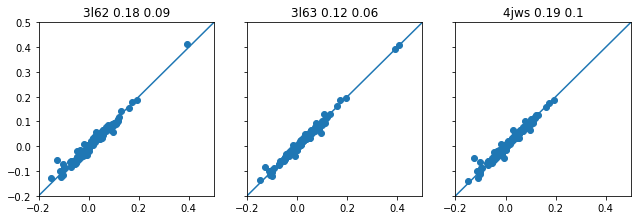

In [4]:
pcs = dataparse.read_pcs('saved_pcs/0_data_from_ubbink/both_exp_closed_HN.npc')
crystals = ['3l62', '3l63', '4jws']

fig,ax=plt.subplots(1,len(crystals),figsize=(3*len(crystals),3), sharex=True, sharey=True)
plt.tight_layout()

for a,coords in enumerate(crystals):
    coords = protein.load_pdb(f'saved_pcs/0_crystals/{coords}.pdb')
    parsed = coords.parse(pcs)
    mstart = metal.Metal()
    mstart.position = coords[0]['A'][195]['CA'].position
    [guess], [data] = fit.svd_gridsearch_fit_metal_from_pcs([mstart], [parsed], radius=10, points=10)
    [mfit], [data] = fit.nlr_fit_metal_from_pcs([guess], [parsed])
#     print(mfit.info())
    print(extract_pc(mfit.info()))
    print(np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][195]['CA'].position*10**10),
          np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][199]['CA'].position*10**10))
    ax[a].scatter(data['exp'], data['cal'])
    ax[a].plot([-0.2,0.5],[-0.2,0.5])
    ax[a].set_title(f'{crystals[a]} {np.round(fit.qfactor(data),2)} {np.round(get_qfactor(data), 2)}')
ax[-1].set_xlim(-0.2,0.5)
ax[-1].set_ylim(-0.2,0.5)
plt.show()

### changing residue number

[(91, 'HN')]
SVD gridsearch started in 3065 points
[-11.294  -3.343]
11.740405309979355 16.126623911012107
SVD gridsearch started in 3065 points
[-7.546 -3.56 ]
9.065576639832026 11.256487315329597
[(96, 'HN'), (91, 'HN')]
SVD gridsearch started in 3065 points
[-8.884 -3.29 ]
6.552858165447786 11.964827731955266


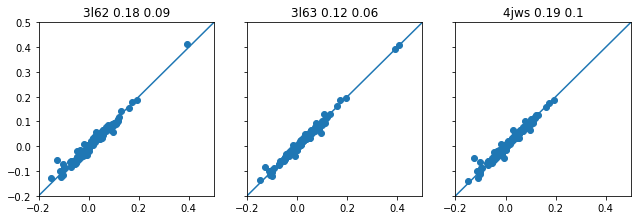

In [5]:
pcs = dataparse.read_pcs('saved_pcs/0_data_from_ubbink/both_exp_closed_HN.npc')
crystals = ['3l62', '3l63', '4jws']

fig,ax=plt.subplots(1,len(crystals),figsize=(3*len(crystals),3), sharex=True, sharey=True)
plt.tight_layout()

for a,coords in enumerate(crystals):
    coords = protein.load_pdb(f'saved_pcs/0_crystals/{coords}.pdb')
    parsed = coords.parse(pcs)
    mstart = metal.Metal()
    mstart.position = coords[0]['A'][199]['CA'].position
    [guess], [data] = fit.svd_gridsearch_fit_metal_from_pcs([mstart], [parsed], radius=10, points=10)
    [mfit], [data] = fit.nlr_fit_metal_from_pcs([guess], [parsed])
#     print(mfit.info())
    print(extract_pc(mfit.info()))
    print(np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][195]['CA'].position*10**10),
          np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][199]['CA'].position*10**10))
    ax[a].scatter(data['exp'], data['cal'])
    ax[a].plot([-0.2,0.5],[-0.2,0.5])
    ax[a].set_title(f'{crystals[a]} {np.round(fit.qfactor(data),2)} {np.round(get_qfactor(data), 2)}')
ax[-1].set_xlim(-0.2,0.5)
ax[-1].set_ylim(-0.2,0.5)
plt.show()

### increasing radii and points

[(91, 'HN')]
SVD gridsearch started in 101859 points
[-11.294  -3.343]
11.740405309979355 16.126623911012107
SVD gridsearch started in 101859 points
[-7.546 -3.56 ]
9.065576639832026 11.256487315329597
[(96, 'HN'), (91, 'HN')]
SVD gridsearch started in 101859 points
[-8.884 -3.29 ]
6.552858165447786 11.964827731955266


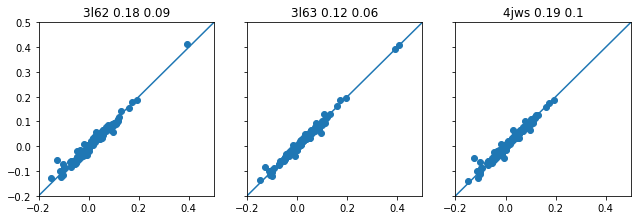

In [6]:
pcs = dataparse.read_pcs('saved_pcs/0_data_from_ubbink/both_exp_closed_HN.npc')
crystals = ['3l62', '3l63', '4jws']

fig,ax=plt.subplots(1,len(crystals),figsize=(3*len(crystals),3), sharex=True, sharey=True)
plt.tight_layout()

for a,coords in enumerate(crystals):
    coords = protein.load_pdb(f'saved_pcs/0_crystals/{coords}.pdb')
    parsed = coords.parse(pcs)
    mstart = metal.Metal()
    mstart.position = coords[0]['A'][195]['CA'].position
    [guess], [data] = fit.svd_gridsearch_fit_metal_from_pcs([mstart], [parsed], radius=30, points=30)
    [mfit], [data] = fit.nlr_fit_metal_from_pcs([guess], [parsed])
#     print(mfit.info())
    print(extract_pc(mfit.info()))
    print(np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][195]['CA'].position*10**10),
          np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][199]['CA'].position*10**10))
    ax[a].scatter(data['exp'], data['cal'])
    ax[a].plot([-0.2,0.5],[-0.2,0.5])
    ax[a].set_title(f'{crystals[a]} {np.round(fit.qfactor(data),2)} {np.round(get_qfactor(data), 2)}')
ax[-1].set_xlim(-0.2,0.5)
ax[-1].set_ylim(-0.2,0.5)
plt.show()

## going ahead with static - it matches with specifically 3l63

[(91, 'HN')]
SVD gridsearch started in 3065 points
[-6.542 -4.098]
6.57811531525679 11.216745528784521
SVD gridsearch started in 3065 points
[-7.198 -4.049]
7.892492454952483 8.574990015217406
[(91, 'HN')]
SVD gridsearch started in 3065 points
[-6.967 -3.998]
6.446204163031281 11.932424914956515


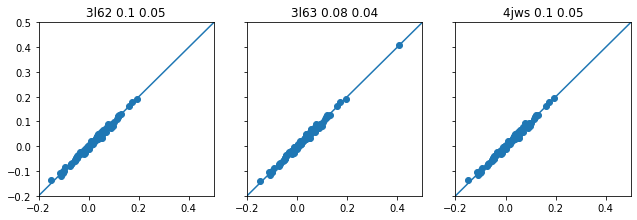

In [7]:
pcs = dataparse.read_pcs('saved_pcs/0_data_from_ubbink/static_exp_closed_HN.npc')
crystals = ['3l62', '3l63', '4jws']

fig,ax=plt.subplots(1,len(crystals),figsize=(3*len(crystals),3), sharex=True, sharey=True)
plt.tight_layout()

for a,coords in enumerate(crystals):
    coords = protein.load_pdb(f'saved_pcs/0_crystals/{coords}.pdb')
    parsed = coords.parse(pcs)
    mstart = metal.Metal()
    mstart.position = coords[0]['A'][195]['CA'].position
    [guess], [data] = fit.svd_gridsearch_fit_metal_from_pcs([mstart], [parsed], radius=10, points=10)
    [mfit], [data] = fit.nlr_fit_metal_from_pcs([guess], [parsed])
#     print(mfit.info())
    print(extract_pc(mfit.info()))
    print(np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][195]['CA'].position*10**10),
          np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][199]['CA'].position*10**10))
    ax[a].scatter(data['exp'], data['cal'])
    ax[a].plot([-0.2,0.5],[-0.2,0.5])
    ax[a].set_title(f'{crystals[a]} {np.round(fit.qfactor(data),2)} {np.round(get_qfactor(data), 2)}')
ax[-1].set_xlim(-0.2,0.5)
ax[-1].set_ylim(-0.2,0.5)
plt.show()

# substrate-free N-Leu data - no matching with anything

Line ignored while reading file: saved_pcs/0_data_from_ubbink/observed_pcs_substrate-free_errors.npc
134 N 

Line ignored while reading file: saved_pcs/0_data_from_ubbink/observed_pcs_substrate-free_errors.npc
289 N 

SVD gridsearch started in 3065 points
[-6.778 -2.733]
11.093461102573675 15.72733477475841
SVD gridsearch started in 3065 points
[-5.564 -2.771]
10.488462886127264 11.61066886175636
SVD gridsearch started in 3065 points
[-3.957 -1.669]
10.816549380178348 5.778825371103467


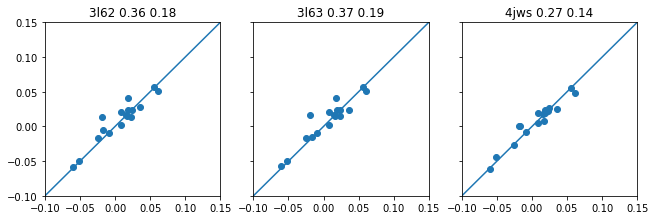

In [8]:
pcs = dataparse.read_pcs('saved_pcs/0_data_from_ubbink/observed_pcs_substrate-free_errors.npc')
crystals = ['3l62', '3l63', '4jws']

fig,ax=plt.subplots(1,len(crystals),figsize=(3*len(crystals),3), sharex=True, sharey=True)
plt.tight_layout()

for a,coords in enumerate(crystals):
    coords = protein.load_pdb(f'saved_pcs/0_crystals/{coords}.pdb')
    parsed = coords.parse(pcs)
    mstart = metal.Metal()
    mstart.position = coords[0]['A'][195]['CA'].position
    [guess], [data] = fit.svd_gridsearch_fit_metal_from_pcs([mstart], [parsed], radius=10, points=10)
    [mfit], [data] = fit.nlr_fit_metal_from_pcs([guess], [parsed])
#     print(mfit.info())
    print(extract_pc(mfit.info()))
    print(np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][195]['CA'].position*10**10),
          np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][199]['CA'].position*10**10))
    ax[a].scatter(data['exp'], data['cal'])
    ax[a].plot([-0.1,0.15],[-0.1,0.15])
    ax[a].set_title(f'{crystals[a]} {np.round(fit.qfactor(data),2)} {np.round(get_qfactor(data), 2)}')
ax[-1].set_xlim(-0.1,0.15)
ax[-1].set_ylim(-0.1,0.15)
plt.show()

# with-cam N-Leu data - no matching with anything (better with 3l63)

SVD gridsearch started in 3065 points
[-6.224 -2.977]
7.4575846533825425 12.588354222442208
SVD gridsearch started in 3065 points
[-6.667 -2.786]
6.5866366738416025 9.10774765521669
SVD gridsearch started in 3065 points
[-6.55  -2.912]
7.216411277270608 12.920923493226674


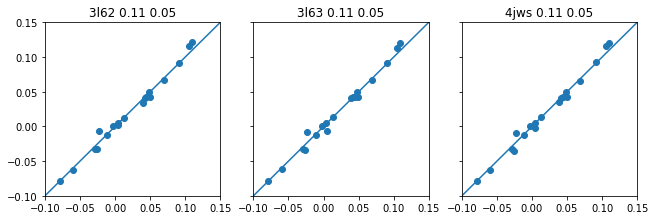

In [9]:
pcs = dataparse.read_pcs('saved_pcs/0_data_from_ubbink/observed_pcs_with_cam_errors.npc')
crystals = ['3l62', '3l63', '4jws']

fig,ax=plt.subplots(1,len(crystals),figsize=(3*len(crystals),3), sharex=True, sharey=True)
plt.tight_layout()

for a,coords in enumerate(crystals):
    coords = protein.load_pdb(f'saved_pcs/0_crystals/{coords}.pdb')
    parsed = coords.parse(pcs)
    mstart = metal.Metal()
    mstart.position = coords[0]['A'][195]['CA'].position
    [guess], [data] = fit.svd_gridsearch_fit_metal_from_pcs([mstart], [parsed], radius=10, points=10)
    [mfit], [data] = fit.nlr_fit_metal_from_pcs([guess], [parsed])
#     print(mfit.info())
    print(extract_pc(mfit.info()))
    print(np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][195]['CA'].position*10**10),
          np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][199]['CA'].position*10**10))
    ax[a].scatter(data['exp'], data['cal'])
    ax[a].plot([-0.1,0.15],[-0.1,0.15])
    ax[a].set_title(f'{crystals[a]} {np.round(fit.qfactor(data),2)} {np.round(get_qfactor(data), 2)}')
ax[-1].set_xlim(-0.1,0.15)
ax[-1].set_ylim(-0.1,0.15)
plt.show()

# with-cam-pdx N-Leu data - no matching with anything  (better with 3l63)

SVD gridsearch started in 3065 points
[-7.086 -2.561]
6.803705948677067 12.445053693167095
SVD gridsearch started in 3065 points
[-7.441 -2.464]
6.330865749110693 9.648404799734266
SVD gridsearch started in 3065 points
[-7.319 -2.477]
6.285801710775438 12.375254938467089


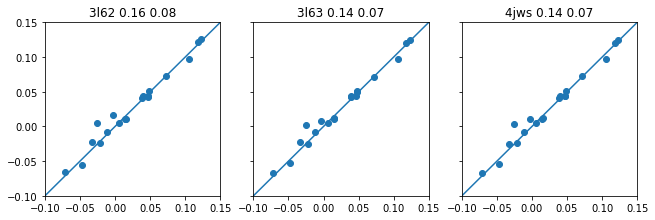

In [10]:
pcs = dataparse.read_pcs('saved_pcs/0_data_from_ubbink/observed_pcs_with_cam_pdx_errors.npc')
crystals = ['3l62', '3l63', '4jws']

fig,ax=plt.subplots(1,len(crystals),figsize=(3*len(crystals),3), sharex=True, sharey=True)
plt.tight_layout()

for a,coords in enumerate(crystals):
    coords = protein.load_pdb(f'saved_pcs/0_crystals/{coords}.pdb')
    parsed = coords.parse(pcs)
    mstart = metal.Metal()
    mstart.position = coords[0]['A'][195]['CA'].position
    [guess], [data] = fit.svd_gridsearch_fit_metal_from_pcs([mstart], [parsed], radius=10, points=10)
    [mfit], [data] = fit.nlr_fit_metal_from_pcs([guess], [parsed])
#     print(mfit.info())
    print(extract_pc(mfit.info()))
    print(np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][195]['CA'].position*10**10),
          np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][199]['CA'].position*10**10))
    ax[a].scatter(data['exp'], data['cal'])
    ax[a].plot([-0.1,0.15],[-0.1,0.15])
    ax[a].set_title(f'{crystals[a]} {np.round(fit.qfactor(data),2)} {np.round(get_qfactor(data), 2)}')
ax[-1].set_xlim(-0.1,0.15)
ax[-1].set_ylim(-0.1,0.15)
plt.show()

# checking what distortions do - it changes the match

### checking with static HN data, which matches with 3l63 specifically

SVD gridsearch started in 3065 points
[-7.198 -4.049]
7.892492454952483 8.574990015217406
SVD gridsearch started in 3065 points
[-6.692 -4.202]
7.990968770068429 9.15253870396793
SVD gridsearch started in 3065 points
[-6.547 -4.097]
7.639392364704444 8.5658924396361
SVD gridsearch started in 3065 points
[-7.282 -2.748]
9.204060503809298 11.37404597085539
SVD gridsearch started in 3065 points
[-18.779  -5.626]
12.8538303947504 10.753783260206687


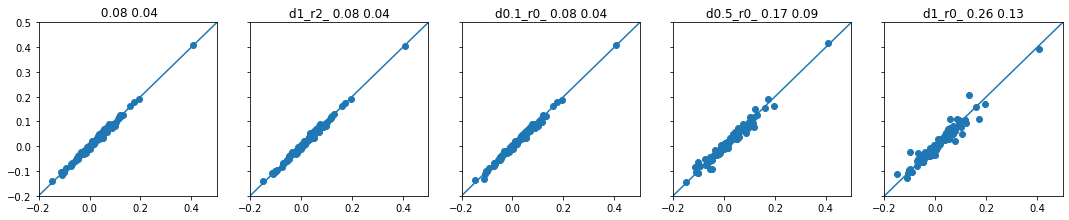

In [12]:
pcs = dataparse.read_pcs('saved_pcs/0_data_from_ubbink/static_exp_closed_HN.npc')
crystals = ['', 'd1_r2_', 'd0.1_r0_', 'd0.5_r0_', 'd1_r0_']

fig,ax=plt.subplots(1,len(crystals),figsize=(3*len(crystals),3), sharex=True, sharey=True)
plt.tight_layout()

for a,coords in enumerate(crystals):
    coords = protein.load_pdb(f'saved_pcs/0_crystals/{coords}3l63.pdb')
    parsed = coords.parse(pcs)
    mstart = metal.Metal()
    mstart.position = coords[0]['A'][195]['CA'].position
    [guess], [data] = fit.svd_gridsearch_fit_metal_from_pcs([mstart], [parsed], radius=10, points=10)
    [mfit], [data] = fit.nlr_fit_metal_from_pcs([guess], [parsed])
#     print(mfit.info())
    print(extract_pc(mfit.info()))
    print(np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][195]['CA'].position*10**10),
          np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][199]['CA'].position*10**10))
    ax[a].scatter(data['exp'], data['cal'])
    ax[a].plot([-0.2,0.5],[-0.2,0.5])
    ax[a].set_title(f'{crystals[a]} {np.round(fit.qfactor(data),2)} {np.round(get_qfactor(data), 2)}')
ax[-1].set_xlim(-0.2,0.5)
ax[-1].set_ylim(-0.2,0.5)
plt.show()

## final plots

In [20]:
pcs = dataparse.read_pcs('saved_pcs/0_data_from_ubbink/static_exp_closed_HN.npc')
crystals = ['3l62', '3l63', '4jws']
#
d1 = np.zeros((len(crystals),2))
q1 = np.zeros((len(crystals)))
#
for a,coords in enumerate(crystals):
    coords = protein.load_pdb(f'saved_pcs/0_crystals/{coords}.pdb')
    parsed = coords.parse(pcs)
    mstart = metal.Metal()
    mstart.position = coords[0]['A'][195]['CA'].position
    [guess], [data] = fit.svd_gridsearch_fit_metal_from_pcs([mstart], [parsed], radius=10, points=10)
    [mfit], [data] = fit.nlr_fit_metal_from_pcs([guess], [parsed])
    #
    d1[a] = [np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][195]['CA'].position*10**10),
             np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][199]['CA'].position*10**10)]
    q1[a] = get_qfactor(data)

[(91, 'HN')]
SVD gridsearch started in 3065 points
SVD gridsearch started in 3065 points
[(91, 'HN')]
SVD gridsearch started in 3065 points


In [33]:
# initial quess - 199
pcs = dataparse.read_pcs('saved_pcs/0_data_from_ubbink/static_exp_closed_HN.npc')
crystals = ['3l62', '3l63', '4jws']
#
d2 = np.zeros((len(crystals),2))
q2 = np.zeros((len(crystals)))
#
for a,coords in enumerate(crystals):
    coords = protein.load_pdb(f'saved_pcs/0_crystals/{coords}.pdb')
    parsed = coords.parse(pcs)
    mstart = metal.Metal()
    mstart.position = coords[0]['A'][199]['CA'].position
    [guess], [data] = fit.svd_gridsearch_fit_metal_from_pcs([mstart], [parsed], radius=10, points=10)
    [mfit], [data] = fit.nlr_fit_metal_from_pcs([guess], [parsed])
    #
    d2[a] = [np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][195]['CA'].position*10**10),
             np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][199]['CA'].position*10**10)]
    q2[a] = get_qfactor(data)

[(91, 'HN')]
SVD gridsearch started in 3065 points
SVD gridsearch started in 3065 points
[(91, 'HN')]
SVD gridsearch started in 3065 points


In [36]:
# increasing search parameters
pcs = dataparse.read_pcs('saved_pcs/0_data_from_ubbink/static_exp_closed_HN.npc')
crystals = ['3l62', '3l63', '4jws']
#
d3 = np.zeros((len(crystals),2))
q3 = np.zeros((len(crystals)))
#
for a,coords in enumerate(crystals):
    coords = protein.load_pdb(f'saved_pcs/0_crystals/{coords}.pdb')
    parsed = coords.parse(pcs)
    mstart = metal.Metal()
    mstart.position = coords[0]['A'][195]['CA'].position
    [guess], [data] = fit.svd_gridsearch_fit_metal_from_pcs([mstart], [parsed], radius=100, points=100)
    [mfit], [data] = fit.nlr_fit_metal_from_pcs([guess], [parsed])
    #
    d3[a] = [np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][195]['CA'].position*10**10),
             np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][199]['CA'].position*10**10)]
    q3[a] = get_qfactor(data)

[(91, 'HN')]
SVD gridsearch started in 4064024 points
SVD gridsearch started in 4064024 points
[(91, 'HN')]
SVD gridsearch started in 4064024 points


In [47]:
pcs = dataparse.read_pcs('saved_pcs/0_data_from_ubbink/static_exp_closed_HN.npc')
crystals = ['d1_r2_', 'd0.1_r0_', 'd0.5_r0_', 'd1_r0_']
#
d4 = np.zeros((len(crystals),2))
q4 = np.zeros((len(crystals)))
#
for a,coords in enumerate(crystals):
    coords = protein.load_pdb(f'saved_pcs/0_crystals/{coords}3l63.pdb')
    parsed = coords.parse(pcs)
    mstart = metal.Metal()
    mstart.position = coords[0]['A'][195]['CA'].position
    [guess], [data] = fit.svd_gridsearch_fit_metal_from_pcs([mstart], [parsed], radius=10, points=10)
    [mfit], [data] = fit.nlr_fit_metal_from_pcs([guess], [parsed])
    #
    d4[a] = [np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][195]['CA'].position*10**10),
             np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][199]['CA'].position*10**10)]
    q4[a] = get_qfactor(data)

SVD gridsearch started in 3065 points
SVD gridsearch started in 3065 points
SVD gridsearch started in 3065 points
SVD gridsearch started in 3065 points


In [63]:
np.savez('saved_pcs/2_output_files/dists_crystals_hn.npz', *[d1, d2, d3, d4])
np.savez('saved_pcs/2_output_files/qscores_crystals_hn.npz', *[q1, q2, q3, q4])

In [6]:
ys = np.load('saved_pcs/2_output_files/dists_crystals_hn.npz')
ys = [ys[i] for i in list(ys)]

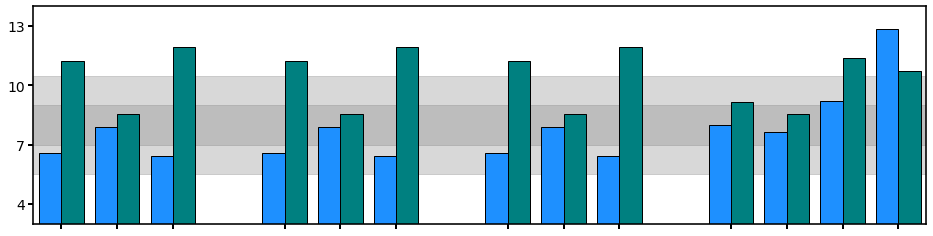

In [9]:
fig,ax=plt.subplots(1, figsize=(16,4))
ax.set_ylim(3,14)
ax.set_xlim(0.5,16.5)
ax.fill_between([0,20],[5.5,5.5], [10.5,10.5], color='grey', alpha=0.3)
ax.fill_between([0,20],[7,7], [9,9], color='grey', alpha=0.3)
#
w=0.4
xs = [[1,2,3], [5,6,7], [9,10,11], [13,14,15,16]]
drip = [-w/2, w/2]
colors = ['dodgerblue', 'teal']
#
for a,y in enumerate(ys):
    for b,d in enumerate(y.T):
        ax.bar(np.array(xs[a])+drip[b], d, width=w, color=colors[b], edgecolor='black')
#
ax.set_xticks(np.concatenate(xs))
ax.set_yticks([4,7,10,13])
ax.spines[:].set_linewidth(1.6)
ax.tick_params(labelbottom=False, length=5, width=2, labelsize=14)
#
plt.savefig('saved_pcs/3_output_plots/dists_crystals_hn.pdf')
plt.show()

In [83]:
q1, q2, q3, q4

(array([0.04800962, 0.03952069, 0.04825914]),
 array([0.04800962, 0.03952069, 0.04825914]),
 array([0.04800962, 0.03952069, 0.04825914]),
 array([0.04017801, 0.04239112, 0.08850814, 0.13080502]))

In [84]:
pcs = dataparse.read_pcs('saved_pcs/0_data_from_ubbink/observed_pcs_substrate-free_errors.npc')
crystals = ['3l62', '3l63', '4jws']
#
d5 = np.zeros((len(crystals),2))
q5 = np.zeros((len(crystals)))
#
for a,coords in enumerate(crystals):
    coords = protein.load_pdb(f'saved_pcs/0_crystals/{coords}.pdb')
    parsed = coords.parse(pcs)
    mstart = metal.Metal()
    mstart.position = coords[0]['A'][195]['CA'].position
    [guess], [data] = fit.svd_gridsearch_fit_metal_from_pcs([mstart], [parsed], radius=10, points=10)
    [mfit], [data] = fit.nlr_fit_metal_from_pcs([guess], [parsed])
    #
    d5[a] = [np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][195]['CA'].position*10**10),
             np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][199]['CA'].position*10**10)]
    q5[a] = get_qfactor(data)

Line ignored while reading file: saved_pcs/0_data_from_ubbink/observed_pcs_substrate-free_errors.npc
134 N 

Line ignored while reading file: saved_pcs/0_data_from_ubbink/observed_pcs_substrate-free_errors.npc
289 N 

SVD gridsearch started in 3065 points
SVD gridsearch started in 3065 points
SVD gridsearch started in 3065 points


In [85]:
pcs = dataparse.read_pcs('saved_pcs/0_data_from_ubbink/observed_pcs_with_cam_errors.npc')
crystals = ['3l62', '3l63', '4jws']
#
d6 = np.zeros((len(crystals),2))
q6 = np.zeros((len(crystals)))
#
for a,coords in enumerate(crystals):
    coords = protein.load_pdb(f'saved_pcs/0_crystals/{coords}.pdb')
    parsed = coords.parse(pcs)
    mstart = metal.Metal()
    mstart.position = coords[0]['A'][195]['CA'].position
    [guess], [data] = fit.svd_gridsearch_fit_metal_from_pcs([mstart], [parsed], radius=10, points=10)
    [mfit], [data] = fit.nlr_fit_metal_from_pcs([guess], [parsed])
    #
    d6[a] = [np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][195]['CA'].position*10**10),
             np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][199]['CA'].position*10**10)]
    q6[a] = get_qfactor(data)

SVD gridsearch started in 3065 points
SVD gridsearch started in 3065 points
SVD gridsearch started in 3065 points


In [86]:
pcs = dataparse.read_pcs('saved_pcs/0_data_from_ubbink/observed_pcs_with_cam_pdx_errors.npc')
crystals = ['3l62', '3l63', '4jws']
#
d7 = np.zeros((len(crystals),2))
q7 = np.zeros((len(crystals)))
#
for a,coords in enumerate(crystals):
    coords = protein.load_pdb(f'saved_pcs/0_crystals/{coords}.pdb')
    parsed = coords.parse(pcs)
    mstart = metal.Metal()
    mstart.position = coords[0]['A'][195]['CA'].position
    [guess], [data] = fit.svd_gridsearch_fit_metal_from_pcs([mstart], [parsed], radius=10, points=10)
    [mfit], [data] = fit.nlr_fit_metal_from_pcs([guess], [parsed])
    #
    d7[a] = [np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][195]['CA'].position*10**10),
             np.linalg.norm(extract_pos(mfit.info())-coords[0]['A'][199]['CA'].position*10**10)]
    q7[a] = get_qfactor(data)

SVD gridsearch started in 3065 points
SVD gridsearch started in 3065 points
SVD gridsearch started in 3065 points


In [91]:
np.save('saved_pcs/2_output_files/dists_crystals_leuN.npy', [d5, d6, d7])
np.save('saved_pcs/2_output_files/qscores_crystals_leuN.npy', [q5, q6, q7])

In [10]:
ys = np.load('saved_pcs/2_output_files/dists_crystals_leuN.npy')

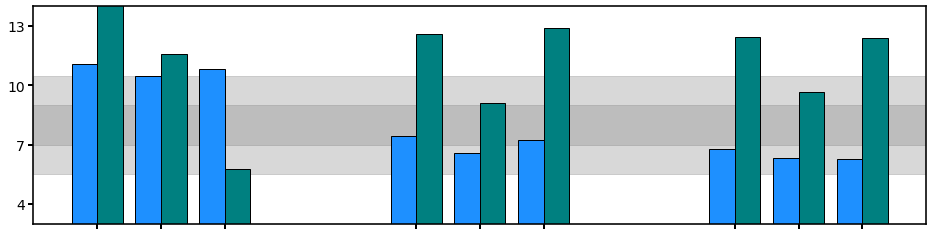

In [12]:
fig,ax=plt.subplots(1, figsize=(16,4))
ax.set_ylim(3,14)
ax.set_xlim(0,14)
ax.fill_between([0,20],[5.5,5.5], [10.5,10.5], color='grey', alpha=0.3)
ax.fill_between([0,20],[7,7], [9,9], color='grey', alpha=0.3)
#
w=0.4
xs = [[1,2,3], [6,7,8], [11,12,13]]
drip = [-w/2, w/2]
colors = ['dodgerblue', 'teal']
#
for a,y in enumerate(ys):
    for b,d in enumerate(y.T):
        ax.bar(np.array(xs[a])+drip[b], d, width=w, color=colors[b], edgecolor='black')
#
ax.set_xticks(np.concatenate(xs))
ax.set_yticks([4,7,10,13])
ax.spines[:].set_linewidth(1.6)
ax.tick_params(labelbottom=False, length=5, width=2, labelsize=14)
#
plt.savefig('saved_pcs/3_output_plots/dists_crystals_leuN.pdf')
plt.show()

In [102]:
q5, q6, q7

(array([0.18384574, 0.18921287, 0.140662  ]),
 array([0.05493287, 0.05477151, 0.05248199]),
 array([0.08221174, 0.06949029, 0.07258221]))

## visualizing tensor

In [75]:
# increasing search parameters
pcs = dataparse.read_pcs('saved_pcs/0_data_from_ubbink/static_exp_closed_HN.npc')
#
coords = protein.load_pdb(f'saved_pcs/0_crystals/3l63.pdb')
parsed = coords.parse(pcs)
mstart = metal.Metal()
mstart.position = coords[0]['A'][195]['CA'].position
[guess], [data] = fit.svd_gridsearch_fit_metal_from_pcs([mstart], [parsed], radius=10, points=10)
[mfit], [data] = fit.nlr_fit_metal_from_pcs([guess], [parsed])
print(mfit.info())

SVD gridsearch started in 3065 points
# ax    | 1E-32 m^3 :    -7.198
# rh    | 1E-32 m^3 :    -4.049
# x     |   1E-10 m :    17.842
# y     |   1E-10 m :   -12.493
# z     |   1E-10 m :    12.878
# a     |       deg :    73.347
# b     |       deg :    12.911
# g     |       deg :   132.974
# mueff |        Bm :     0.000
# shift |       ppm :     0.000
# B0    |         T :    18.790
# temp  |         K :   298.150
# t1e   |        ps :     0.000
# taur  |        ns :     0.000



In [82]:
mfit.save('saved_pcs/3_output_plots/mfit_HN_3l63.txt')
met = metal.load_tensor('saved_pcs/3_output_plots/mfit_HN_3l63.txt')
met.isomap(coords.id, density=1, isoval=1.0)

isomap.pml.ccp4 mesh written
isomap.pml script written


#### pymol isomap.pml

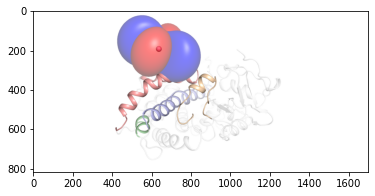

In [101]:
plt.imshow(mt.image.imread('saved_pcs/4_isomap/isomap-1.png'))

## pcs

In [4]:
pcs = dataparse.read_pcs('saved_pcs/0_data_from_ubbink/static_exp_closed_HN.npc')
crystals = ['3l63', 'd1_r0_3l63']
#
pdata = []
#
for a,coords in enumerate(crystals):
    coords = protein.load_pdb(f'saved_pcs/0_crystals/{coords}.pdb')
    parsed = coords.parse(pcs)
    mstart = metal.Metal()
    mstart.position = coords[0]['A'][195]['CA'].position
    [guess], [data] = fit.svd_gridsearch_fit_metal_from_pcs([mstart], [parsed], radius=10, points=10)
    [mfit], [data] = fit.nlr_fit_metal_from_pcs([guess], [parsed])
    #
    pdata.append(data)

SVD gridsearch started in 3065 points
SVD gridsearch started in 3065 points


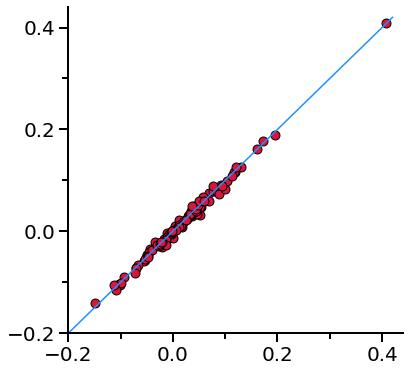

In [31]:
fig,ax=plt.subplots(1, figsize=(6,6))
ax.plot([-0.2,0.42], [-0.2, 0.42], color='dodgerblue')
ax.scatter(pdata[0]['exp'], pdata[0]['cal'], color='crimson', s=80, edgecolor='black')
ax.set_xlim(-0.2,0.44)
ax.set_ylim(-0.2,0.44)
ax.set_xticks([-0.2, 0, 0.2, 0.4])
ax.set_yticks([-0.2, 0, 0.2, 0.4])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.axes.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.axes.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='minor', length=6, width=2)
ax.spines[['right','top']].set_visible(False)
#
plt.savefig(f'saved_pcs/3_output_plots/pcs_HN_3l63.pdf')
plt.show()

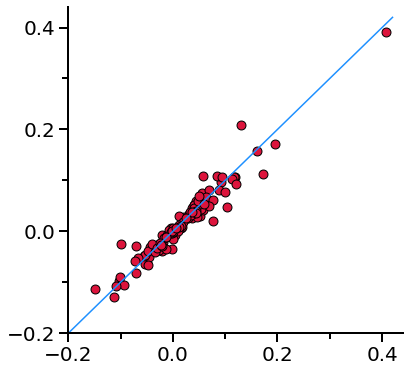

In [32]:
fig,ax=plt.subplots(1, figsize=(6,6))
ax.plot([-0.2,0.42], [-0.2, 0.42], color='dodgerblue')
ax.scatter(pdata[1]['exp'], pdata[1]['cal'], color='crimson', s=80, edgecolor='black')
ax.set_xlim(-0.2,0.44)
ax.set_ylim(-0.2,0.44)
ax.set_xticks([-0.2, 0, 0.2, 0.4])
ax.set_yticks([-0.2, 0, 0.2, 0.4])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.axes.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.axes.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='minor', length=6, width=2)
ax.spines[['right','top']].set_visible(False)
#
plt.savefig(f'saved_pcs/3_output_plots/pcs_HN_d1r0.pdf')
plt.show()

In [4]:
pcs = dataparse.read_pcs('saved_pcs/0_data_from_ubbink/observed_pcs_substrate-free_errors.npc')
coords = protein.load_pdb(f'saved_pcs/0_crystals/4jws.pdb')
parsed = coords.parse(pcs)
mstart = metal.Metal()
mstart.position = coords[0]['A'][195]['CA'].position
[guess], [data] = fit.svd_gridsearch_fit_metal_from_pcs([mstart], [parsed], radius=10, points=10)
[mfit], [data] = fit.nlr_fit_metal_from_pcs([guess], [parsed])

Line ignored while reading file: saved_pcs/0_data_from_ubbink/observed_pcs_substrate-free_errors.npc
134 N 

Line ignored while reading file: saved_pcs/0_data_from_ubbink/observed_pcs_substrate-free_errors.npc
289 N 

SVD gridsearch started in 3065 points


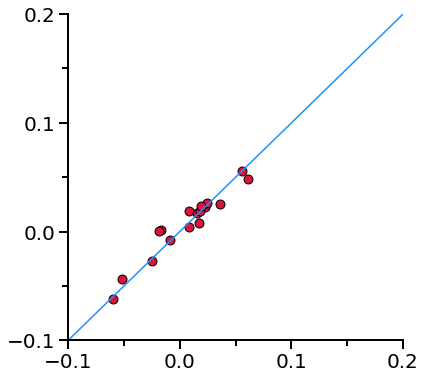

In [7]:
fig,ax=plt.subplots(1, figsize=(6,6))
ax.plot([-0.1,0.2], [-0.1, 0.2], color='dodgerblue')
ax.scatter(data['exp'], data['cal'], color='crimson', s=80, edgecolor='black')
ax.set_xlim(-0.1,0.2)
ax.set_ylim(-0.1,0.2)
ax.set_xticks([-0.1, 0, 0.1, 0.2])
ax.set_yticks([-0.1, 0, 0.1, 0.2])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.axes.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.axes.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='minor', length=6, width=2)
ax.spines[['right','top']].set_visible(False)
#
plt.savefig(f'saved_pcs/3_output_plots/pcs_sf_4jws.pdf')
plt.show()

In [8]:
pcs = dataparse.read_pcs('saved_pcs/0_data_from_ubbink/observed_pcs_with_cam_errors.npc')
coords = protein.load_pdb(f'saved_pcs/0_crystals/3l63.pdb')
parsed = coords.parse(pcs)
mstart = metal.Metal()
mstart.position = coords[0]['A'][195]['CA'].position
[guess], [data] = fit.svd_gridsearch_fit_metal_from_pcs([mstart], [parsed], radius=10, points=10)
[mfit], [data] = fit.nlr_fit_metal_from_pcs([guess], [parsed])

SVD gridsearch started in 3065 points


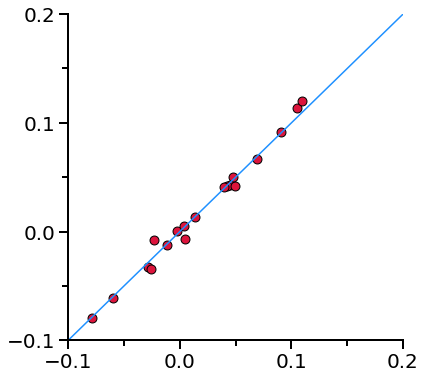

In [9]:
fig,ax=plt.subplots(1, figsize=(6,6))
ax.plot([-0.1,0.2], [-0.1, 0.2], color='dodgerblue')
ax.scatter(data['exp'], data['cal'], color='crimson', s=80, edgecolor='black')
ax.set_xlim(-0.1,0.2)
ax.set_ylim(-0.1,0.2)
ax.set_xticks([-0.1, 0, 0.1, 0.2])
ax.set_yticks([-0.1, 0, 0.1, 0.2])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.axes.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.axes.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='minor', length=6, width=2)
ax.spines[['right','top']].set_visible(False)
#
plt.savefig(f'saved_pcs/3_output_plots/pcs_cam_3l63.pdf')
plt.show()

In [10]:
pcs = dataparse.read_pcs('saved_pcs/0_data_from_ubbink/observed_pcs_with_cam_pdx_errors.npc')
coords = protein.load_pdb(f'saved_pcs/0_crystals/3l63.pdb')
parsed = coords.parse(pcs)
mstart = metal.Metal()
mstart.position = coords[0]['A'][195]['CA'].position
[guess], [data] = fit.svd_gridsearch_fit_metal_from_pcs([mstart], [parsed], radius=10, points=10)
[mfit], [data] = fit.nlr_fit_metal_from_pcs([guess], [parsed])

SVD gridsearch started in 3065 points


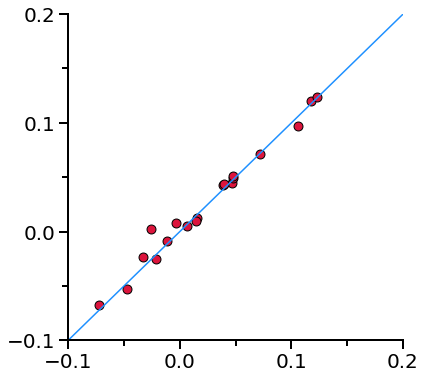

In [11]:
fig,ax=plt.subplots(1, figsize=(6,6))
ax.plot([-0.1,0.2], [-0.1, 0.2], color='dodgerblue')
ax.scatter(data['exp'], data['cal'], color='crimson', s=80, edgecolor='black')
ax.set_xlim(-0.1,0.2)
ax.set_ylim(-0.1,0.2)
ax.set_xticks([-0.1, 0, 0.1, 0.2])
ax.set_yticks([-0.1, 0, 0.1, 0.2])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.axes.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.axes.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='minor', length=6, width=2)
ax.spines[['right','top']].set_visible(False)
#
plt.savefig(f'saved_pcs/3_output_plots/pcs_pdx_3l63.pdf')
plt.show()